<a href="https://colab.research.google.com/github/muniappabalaji/TimeSeries/blob/main/TimeSeries_GreatLearning_July2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [9]:
df = pd.read_csv('Dataset- Superstore (2015-2018).csv')

In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [12]:
sales_data = df[['Order Date', 'Sales']]

In [13]:
sales_data = pd.DataFrame(sales_data)

In [14]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

In [15]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Sales       9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 156.3 KB


In [16]:
df1 = sales_data.set_index('Order Date')

In [17]:
monthly_sales = df1.resample('ME').mean()

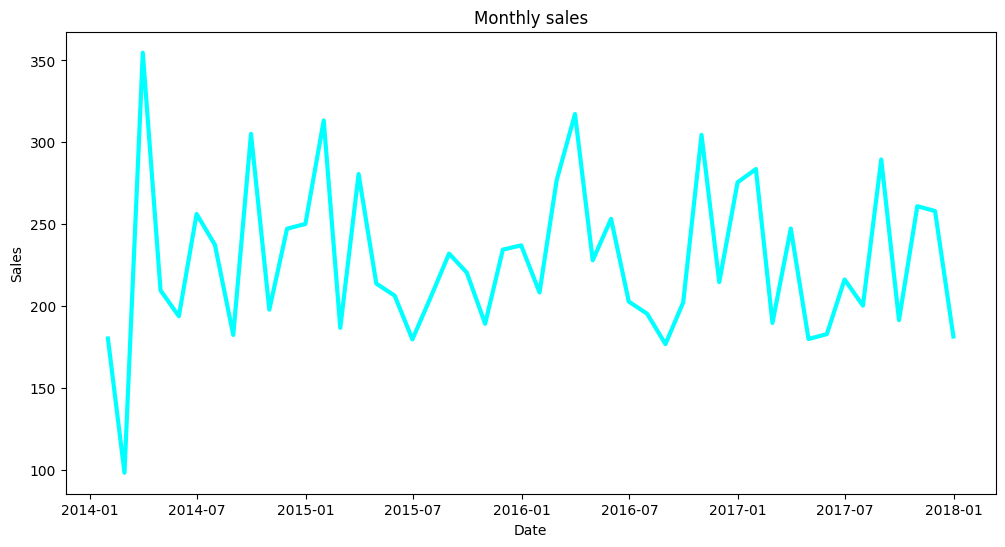

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Sales'], linewidth=3,c='cyan')
plt.title("Monthly sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [19]:
decomposition = seasonal_decompose(monthly_sales['Sales'], model='additive')

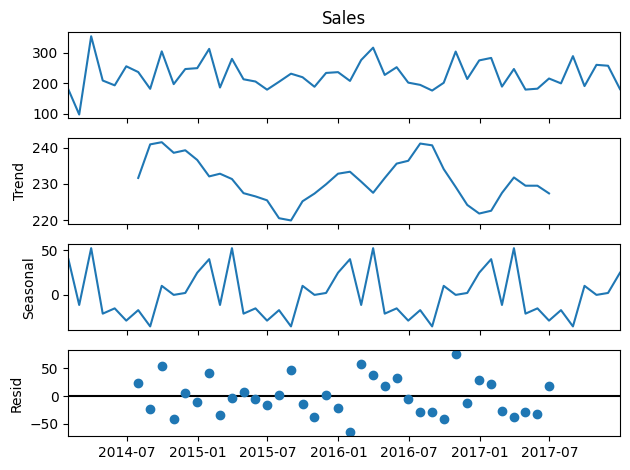

In [20]:
fig = decomposition.plot()
plt.show()

In [21]:
#Null Hypothesis: Data is not stationary
#Alternate Hypothesis: Data is stationary
#need very low p value to accept the alternate hypothesis and reject the null

In [22]:
np.random.seed(0)
random_data = np.random.randn(1000).cumsum()
adf_test = adfuller(random_data)

In [23]:
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -0.5437433594783736
p-value: 0.8831939389121154


In [24]:
def check_stationarity(timeseries):
  result = adfuller(timeseries)
  p_value = result[1]
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Stationary' if p_value < 0.05 else 'Non-Stationary')

In [25]:
check_stationarity(monthly_sales['Sales'])

ADF Statistic: -3.286567
p-value: 0.015490
Stationary


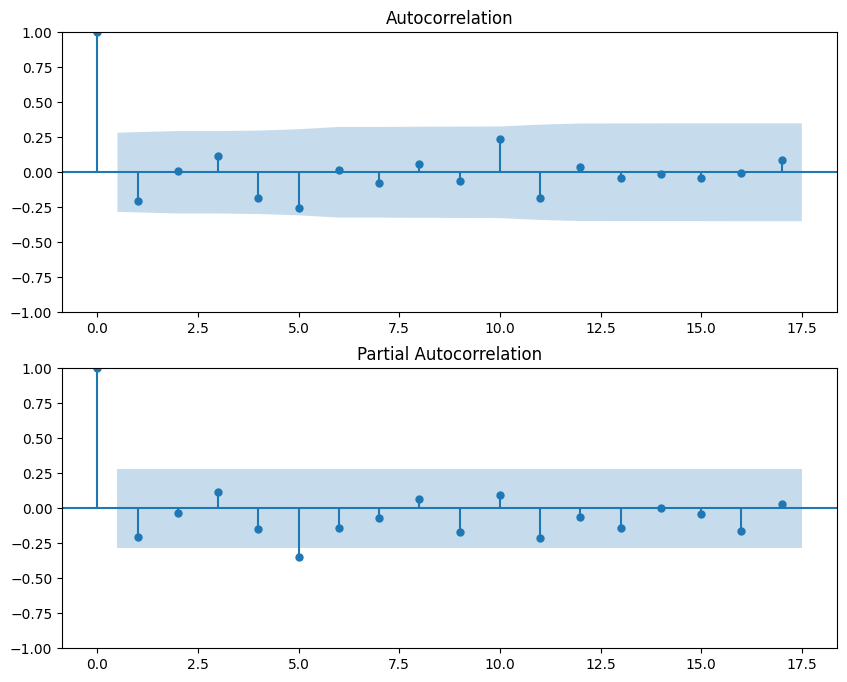

In [26]:
# Plot ACF and PACF to help determine ARIMA parameters
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(monthly_sales['Sales'], ax=axes[0])
plot_pacf(monthly_sales['Sales'], ax=axes[1])
plt.show()

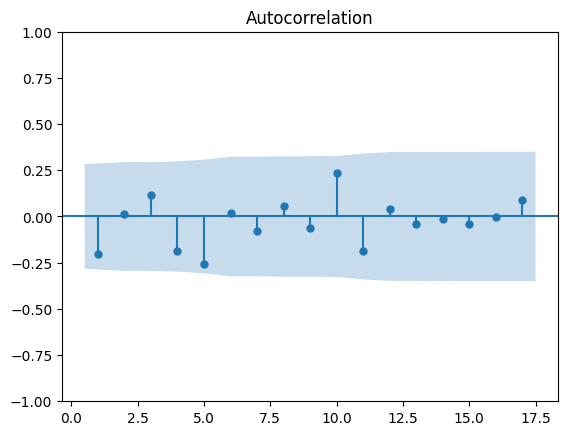

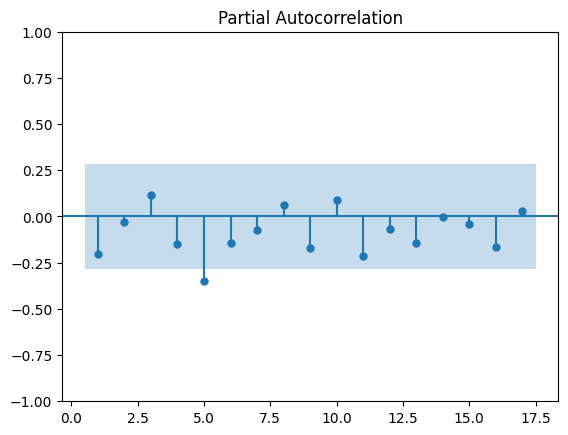

In [28]:
# Plot ACF and PACF
plot_acf(monthly_sales, zero = False)
plot_pacf(monthly_sales, zero = False)
plt.show()

# ARIMA

Divide train (3 years of 36 months) and test (1 year or 12 months)

In [30]:
# Split data into training and testing sets
train_data = monthly_sales[:-12]
test_data = monthly_sales[-12:]
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (36, 1)
Testing data shape: (12, 1)


Fit ARIMA model

AUTO ARIMA link
https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [31]:
model = ARIMA(train_data['Sales'], order=(1, 1, 1))
arima_model = model.fit()

In [32]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -188.049
Date:                Sat, 26 Jul 2025   AIC                            382.097
Time:                        11:47:39   BIC                            386.763
Sample:                    01-31-2014   HQIC                           383.708
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1903      0.230     -0.826      0.409      -0.642       0.261
ma.L1         -0.9993     19.074     -0.052      0.958     -38.383      36.384
sigma2      2427.8365   4.61e+04      0.053      0.9

Evaluate the model

In [35]:
predictions = arima_model.predict(start= len(train_data), end=len(monthly_sales)-1)

In [36]:
print(predictions)

2017-01-31    220.929614
2017-02-28    231.326974
2017-03-31    229.348326
2017-04-30    229.724869
2017-05-31    229.653212
2017-06-30    229.666848
2017-07-31    229.664253
2017-08-31    229.664747
2017-09-30    229.664653
2017-10-31    229.664671
2017-11-30    229.664667
2017-12-31    229.664668
Freq: ME, Name: predicted_mean, dtype: float64


In [37]:
# Evaluate the model using MSE and RMSE
mse = mean_squared_error(test_data['Sales'], predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 1738.6766852208118
RMSE: 41.69744219038875
